In [33]:
!pip install beautifulsoup4

In [34]:
pip install requests-html

In [35]:
from requests_html import HTMLSession

In [36]:
import requests

In [37]:
import pandas as pd

In [38]:
from bs4 import BeautifulSoup

In [39]:
import seaborn as sns

In [65]:
def getnextpage(soup):
    page=soup.find()

In [66]:
s=HTMLSession()

In [90]:
url= "https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1"

# Functions to get the content of the required reviews and pages of website

In [91]:
def getamazon(url):

    soup=BeautifulSoup(r.text,'html.parser')
    return soup

In [92]:
def get_soup(url):

    r=s.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    return soup

In [93]:
review_list = []

In [94]:
def get_reviews(soup):
    reviews=soup.find_all('div',{'data-hook':'review'})
    try:
        for item in reviews:
            review={
                'product':soup.title.text.replace('Amazon.in:Customer reviews: Sparx Men&#39;s Black Flip Flop-8 UK (SF0541G)','Mens Black Flip Flop-8 UK').strip(),
                'title':item.find('a',{'data-hook':'review-title'}).text.strip(),
                'rating':float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars','').strip()),
                'body':item.find('span',{'data-hook':'review-body'}).text.strip()
            }
            review_list.append(review)

    except:
        pass

In [95]:
soup=get_soup('https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1')

In [96]:
print(soup.title.text)

Amazon.in:Customer reviews: Sparx Men&#39;s Black Flip Flop-8 UK (SF0541G)


In [97]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [98]:
get_reviews(soup)

In [99]:
print(len(review_list))

10


In [100]:
review=[]

In [101]:
for x in range(1,8):
    soup=get_soup(f'https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    review += review_list
    print(len(review_list))
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
10
Getting page: 3
10
Getting page: 4
10
Getting page: 5
10
Getting page: 6
10
Getting page: 7
10


In [102]:
review

[{'product': 'Mens Black Flip Flop-8 UK',
  'title': '4.0 out of 5 stars\nServes the purpose',
  'rating': 4.0,
  'body': 'Branded quality with a decent price. Looks decent on wearing. Fit was as expected. Comfortable for daily use.'},
 {'product': 'Mens Black Flip Flop-8 UK',
  'title': '4.0 out of 5 stars\nThis was the best I ever purchased',
  'rating': 4.0,
  'body': 'This sleepers was too good to explain.I purchased it one year ago and it is still goof to use. Best sleeper'},
 {'product': 'Mens Black Flip Flop-8 UK',
  'title': '4.0 out of 5 stars\nSo light waight sleeper s',
  'rating': 4.0,
  'body': 'Good lookingLight waight sleeper'},
 {'product': 'Mens Black Flip Flop-8 UK',
  'title': '4.0 out of 5 stars\n#sparx',
  'rating': 4.0,
  'body': "It's awesome and comfortable"},
 {'product': 'Mens Black Flip Flop-8 UK',
  'title': '4.0 out of 5 stars\nWorth for money',
  'rating': 4.0,
  'body': 'Satisfied with qualityGood product'},
 {'product': 'Mens Black Flip Flop-8 UK',
  'ti

In [103]:
df=pd.DataFrame(review)

In [104]:
#df.to_excel('amazone_review_assignment.xlsx',index=False)

## Created the dataframe for text mining

In [105]:
# df.iloc[8,0]

In [106]:
df

,product,title,rating,body
0,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nServes the purpose,4.0,Branded quality with a decent price. Looks dec...
1,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nThis was the best I ever p...,4.0,This sleepers was too good to explain.I purcha...
2,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nSo light waight sleeper s,4.0,Good lookingLight waight sleeper
3,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\n#sparx,4.0,It's awesome and comfortable
4,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nWorth for money,4.0,Satisfied with qualityGood product
...,...,...,...,...
65,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nNot the bestest of slippers,3.0,Not the bestest of slippers
66,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nAfter 3 Weeks,3.0,The build quality and overall product in this ...
67,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nSize is very large,3.0,Dislike
68,Mens Black Flip Flop-8 UK,5.0 out of 5 stars\nGood for rough use,5.0,Light weight and comfortable


# Text Mining

In [107]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

In [108]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [109]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

In [110]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
df.head(50)

,product,title,rating,body
0,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nServes the purpose,4.0,Branded quality with a decent price. Looks dec...
1,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nThis was the best I ever p...,4.0,This sleepers was too good to explain.I purcha...
2,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nSo light waight sleeper s,4.0,Good lookingLight waight sleeper
3,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\n#sparx,4.0,It's awesome and comfortable
4,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nWorth for money,4.0,Satisfied with qualityGood product
5,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nNot the bestest of slippers,3.0,Not the bestest of slippers
6,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nAfter 3 Weeks,3.0,The build quality and overall product in this ...
7,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nSize is very large,3.0,Dislike
8,Mens Black Flip Flop-8 UK,5.0 out of 5 stars\nGood for rough use,5.0,Light weight and comfortable
9,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nGood,4.0,But someone stolen from masjid.


In [112]:
df['body']

0     Branded quality with a decent price. Looks dec...
1     This sleepers was too good to explain.I purcha...
2                      Good lookingLight waight sleeper
3                          It's awesome and comfortable
4                    Satisfied with qualityGood product
                            ...                        
65                          Not the bestest of slippers
66    The build quality and overall product in this ...
67                                              Dislike
68                         Light weight and comfortable
69                      But someone stolen from masjid.
Name: body, Length: 70, dtype: object

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  70 non-null     object 
 1   title    70 non-null     object 
 2   rating   70 non-null     float64
 3   body     70 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.3+ KB


In [114]:
df.describe()

,rating
count,70.000000
mean,3.800000
std,0.604332
min,3.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


# Data frame contain non-english languages letus Translate it

In [115]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=b509795df76c1d9cf1089e2fa12eada9fd362fccfe30b57a60e876ef07c73760
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling ch

In [116]:
import pandas as pd
from googletrans import Translator

In [117]:
# Initialize the translator object
translator = Translator(service_urls=['translate.google.com'])

In [118]:
# Define a function to translate non-English text to English
def translate_text(text):
    try:
        return translator.translate(text).text
    except Exception as e:
        print(e)
        return None

df['body_en'] = df['body'].apply(translate_text)

In [119]:
# Print the translated DataFrame
df

,product,title,rating,body,body_en
0,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nServes the purpose,4.0,Branded quality with a decent price. Looks dec...,Branded quality with a decent price. Looks dec...
1,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nThis was the best I ever p...,4.0,This sleepers was too good to explain.I purcha...,This sleepers was too good to explain.I purcha...
2,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nSo light waight sleeper s,4.0,Good lookingLight waight sleeper,Good looking Lightweight sleeper
3,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\n#sparx,4.0,It's awesome and comfortable,It's awesome and comfortable
4,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nWorth for money,4.0,Satisfied with qualityGood product,Satisfied with qualityGood product
...,...,...,...,...,...
65,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nNot the bestest of slippers,3.0,Not the bestest of slippers,Not the bestest of slippers
66,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nAfter 3 Weeks,3.0,The build quality and overall product in this ...,The build quality and overall product in this ...
67,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nSize is very large,3.0,Dislike,Dislike
68,Mens Black Flip Flop-8 UK,5.0 out of 5 stars\nGood for rough use,5.0,Light weight and comfortable,Light weight and comfortable


## Data Text processing (converting to lowe case ,stemming and removing stopwords)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  70 non-null     object 
 1   title    70 non-null     object 
 2   rating   70 non-null     float64
 3   body     70 non-null     object 
 4   body_en  70 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [121]:
Data=pd.DataFrame()

In [122]:
Data=df.drop(['product','body'],axis=1)

In [123]:
Data

,title,rating,body_en
0,4.0 out of 5 stars\nServes the purpose,4.0,Branded quality with a decent price. Looks dec...
1,4.0 out of 5 stars\nThis was the best I ever p...,4.0,This sleepers was too good to explain.I purcha...
2,4.0 out of 5 stars\nSo light waight sleeper s,4.0,Good looking Lightweight sleeper
3,4.0 out of 5 stars\n#sparx,4.0,It's awesome and comfortable
4,4.0 out of 5 stars\nWorth for money,4.0,Satisfied with qualityGood product
...,...,...,...
65,3.0 out of 5 stars\nNot the bestest of slippers,3.0,Not the bestest of slippers
66,3.0 out of 5 stars\nAfter 3 Weeks,3.0,The build quality and overall product in this ...
67,3.0 out of 5 stars\nSize is very large,3.0,Dislike
68,5.0 out of 5 stars\nGood for rough use,5.0,Light weight and comfortable


In [124]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [125]:
def preprocess(X):
  X=re.sub('[^a-zA-Z ]', '', X)
  X=X.lower()
  X=X.split()
  X=[word for word in X if word not in stopwords]
  X=[ps.stem(word) for word in X]
  X=" ".join(X)
  return X

In [126]:
ps = PorterStemmer()

In [127]:
Data['body_en']=Data['body_en'].apply(preprocess)

In [128]:
Data.head(20)

,title,rating,body_en
0,4.0 out of 5 stars\nServes the purpose,4.0,brand qualiti decent price look decent wear fi...
1,4.0 out of 5 stars\nThis was the best I ever p...,4.0,sleeper good explaini purchas one year ago sti...
2,4.0 out of 5 stars\nSo light waight sleeper s,4.0,good look lightweight sleeper
3,4.0 out of 5 stars\n#sparx,4.0,awesom comfort
4,4.0 out of 5 stars\nWorth for money,4.0,satisfi qualitygood product
5,3.0 out of 5 stars\nNot the bestest of slippers,3.0,bestest slipper
6,3.0 out of 5 stars\nAfter 3 Weeks,3.0,build qualiti overal product price rang worth ...
7,3.0 out of 5 stars\nSize is very large,3.0,dislik
8,5.0 out of 5 stars\nGood for rough use,5.0,light weight comfort
9,4.0 out of 5 stars\nGood,4.0,someon stolen masjid


## Count Vectorizer

In [129]:
a=np.array(Data['body_en'])

In [130]:
cv=CountVectorizer(ngram_range=(1,1))
a=cv.fit_transform(a).toarray()
cv.vocabulary_

{'brand': 4,
 'qualiti': 25,
 'decent': 8,
 'price': 22,
 'look': 17,
 'wear': 36,
 'fit': 12,
 'expect': 10,
 'comfort': 6,
 'daili': 7,
 'use': 35,
 'sleeper': 29,
 'good': 13,
 'explaini': 11,
 'purchas': 24,
 'one': 20,
 'year': 39,
 'ago': 0,
 'still': 33,
 'goof': 14,
 'best': 2,
 'lightweight': 16,
 'awesom': 1,
 'satisfi': 28,
 'qualitygood': 26,
 'product': 23,
 'bestest': 3,
 'slipper': 30,
 'build': 5,
 'overal': 21,
 'rang': 27,
 'worth': 38,
 'money': 19,
 'spent': 32,
 'dislik': 9,
 'light': 15,
 'weight': 37,
 'someon': 31,
 'stolen': 34,
 'masjid': 18}

In [131]:
Z = cv.fit_transform(Data["body_en"])
sum_words = Z.sum(axis=0)
words_frequency = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
DF = pd.DataFrame(words_frequency)
DF.columns = ['Words', 'Count']

DF[0:10]

,Words,Count
0,comfort,21
1,sleeper,21
2,qualiti,14
3,decent,14
4,price,14
5,look,14
6,use,14
7,good,14
8,product,14
9,brand,7


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='Words'>

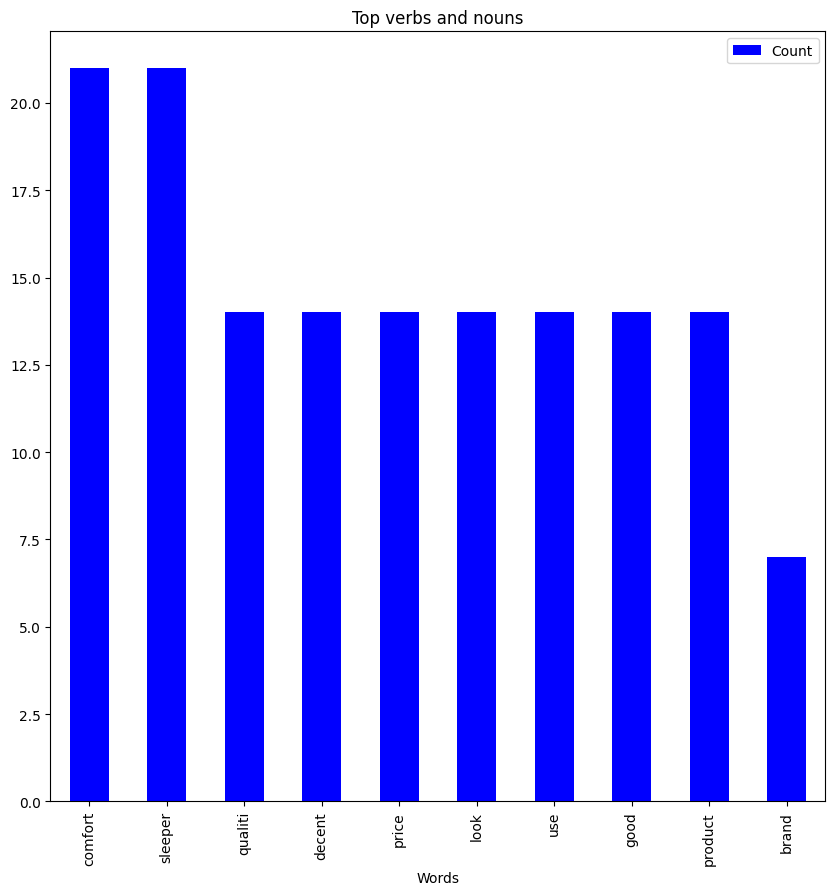

In [132]:
DF[0:10].plot.bar(x='Words', figsize=(10,10), title='Top verbs and nouns',color='blue')

In [133]:
rating_counts = Data["rating"].value_counts()

In [134]:
rating_counts

4.0    42
3.0    21
5.0     7
Name: rating, dtype: int64

In [135]:
Data['rating']

0     4.0
1     4.0
2     4.0
3     4.0
4     4.0
     ... 
65    3.0
66    3.0
67    3.0
68    5.0
69    4.0
Name: rating, Length: 70, dtype: float64

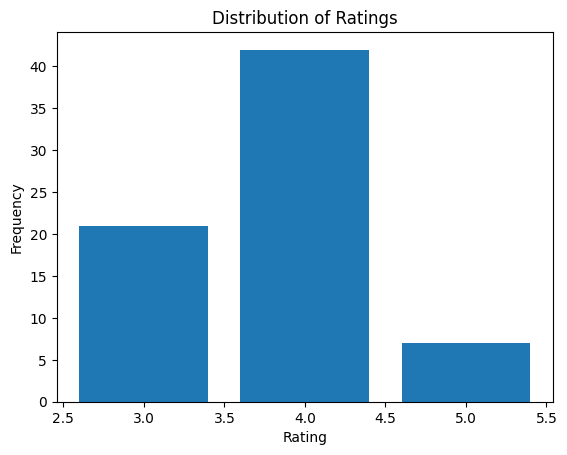

In [136]:
# Plot a bar chart
plt.bar(x=rating_counts.index, height=rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

In [137]:
cv.get_feature_names_out()

array(['ago', 'awesom', 'best', 'bestest', 'brand', 'build', 'comfort',
       'daili', 'decent', 'dislik', 'expect', 'explaini', 'fit', 'good',
       'goof', 'light', 'lightweight', 'look', 'masjid', 'money', 'one',
       'overal', 'price', 'product', 'purchas', 'qualiti', 'qualitygood',
       'rang', 'satisfi', 'sleeper', 'slipper', 'someon', 'spent',
       'still', 'stolen', 'use', 'wear', 'weight', 'worth', 'year'],
      dtype=object)

In [138]:
cv.analyzer

'word'

In [139]:
CountVector=pd.DataFrame(a,columns=cv.get_feature_names_out())

In [140]:
CountVector

,ago,awesom,best,bestest,brand,build,comfort,daili,decent,dislik,...,slipper,someon,spent,still,stolen,use,wear,weight,worth,year
0,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
67,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## TF-IDF

In [141]:
b=np.array(Data["body_en"])

In [142]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_

{'brand': 4,
 'qualiti': 25,
 'decent': 8,
 'price': 22,
 'look': 17,
 'wear': 36,
 'fit': 12,
 'expect': 10,
 'comfort': 6,
 'daili': 7,
 'use': 35,
 'sleeper': 29,
 'good': 13,
 'explaini': 11,
 'purchas': 24,
 'one': 20,
 'year': 39,
 'ago': 0,
 'still': 33,
 'goof': 14,
 'best': 2,
 'lightweight': 16,
 'awesom': 1,
 'satisfi': 28,
 'qualitygood': 26,
 'product': 23,
 'bestest': 3,
 'slipper': 30,
 'build': 5,
 'overal': 21,
 'rang': 27,
 'worth': 38,
 'money': 19,
 'spent': 32,
 'dislik': 9,
 'light': 15,
 'weight': 37,
 'someon': 31,
 'stolen': 34,
 'masjid': 18}

In [143]:
TFIDF=pd.DataFrame(b,columns=tv.get_feature_names_out())
TFIDF

,ago,awesom,best,bestest,brand,build,comfort,daili,decent,dislik,...,slipper,someon,spent,still,stolen,use,wear,weight,worth,year
0,0.000000,0.000000,0.000000,0.000000,0.288176,0.000000,0.196597,0.288176,0.576352,0.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.231269,0.288176,0.000000,0.000000,0.000000
1,0.290322,0.000000,0.290322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.290322,0.00000,0.232990,0.000000,0.000000,0.000000,0.290322
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.826077,0.000000,0.000000,0.000000,0.000000,0.563558,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.707107,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
66,0.000000,0.000000,0.000000,0.000000,0.000000,0.355062,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00000,0.355062,0.000000,0.00000,0.000000,0.000000,0.000000,0.355062,0.000000
67,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434484,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.636877,0.000000,0.000000


In [144]:
TFIDF.head(5)

,ago,awesom,best,bestest,brand,build,comfort,daili,decent,dislik,...,slipper,someon,spent,still,stolen,use,wear,weight,worth,year
0,0.000000,0.000000,0.000000,0.0,0.288176,0.0,0.196597,0.288176,0.576352,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.231269,0.288176,0.0,0.0,0.000000
1,0.290322,0.000000,0.290322,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.290322,0.0,0.232990,0.000000,0.0,0.0,0.290322
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.826077,0.000000,0.0,0.000000,0.0,0.563558,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


## Sentimental Analysis

In [145]:
affin=Data["body_en"]

In [146]:
affin

0     brand qualiti decent price look decent wear fi...
1     sleeper good explaini purchas one year ago sti...
2                         good look lightweight sleeper
3                                        awesom comfort
4                           satisfi qualitygood product
                            ...                        
65                                      bestest slipper
66    build qualiti overal product price rang worth ...
67                                               dislik
68                                 light weight comfort
69                                 someon stolen masjid
Name: body_en, Length: 70, dtype: object

### Vader Lexicon

In [147]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [148]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [149]:
def get_vader_sentiment(letter):

  sia=SentimentIntensityAnalyzer()
  # create text blob object of passed tweet text
  analysis=sia.polarity_scores(letter)
  # set sentiment
  if analysis["compound"]>0:
    return "Satisfied"
  elif analysis["compound"]<0:
    return "Not satisfied"
  else:
    return "neutral"

In [150]:
Emotion=pd.DataFrame()

In [151]:
Emotion["sentiment"]=Data["body_en"].apply(get_vader_sentiment)

In [152]:
Data["Sentiment"] = Data["body_en"].apply(get_vader_sentiment)

In [153]:
sia=SentimentIntensityAnalyzer()

In [154]:
Data['scores']=Data['body_en'].apply(lambda letter: sia.polarity_scores(letter))

In [155]:
Data['compound']=Data['scores'].apply(lambda scores: scores['compound'])

In [156]:
Data['comp_score'] = Data['compound'].apply(lambda comp: 'Satisfied' if comp > 0 else ('Not satisfied' if comp < 0 else 'neutral'))

In [157]:
Data['scores']

0     {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...
1     {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...
2     {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...
3     {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                            ...                        
65    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
66    {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...
67    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
68    {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...
69    {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...
Name: scores, Length: 70, dtype: object

In [158]:
Data['compound']

0     0.6124
1     0.7964
2     0.4404
3     0.3612
4     0.0000
       ...  
65    0.0000
66    0.2263
67    0.0000
68    0.3612
69   -0.4939
Name: compound, Length: 70, dtype: float64

In [159]:
Data.index

RangeIndex(start=0, stop=70, step=1)

Text(0.5, 1.0, 'Emotion plot for each Customer')

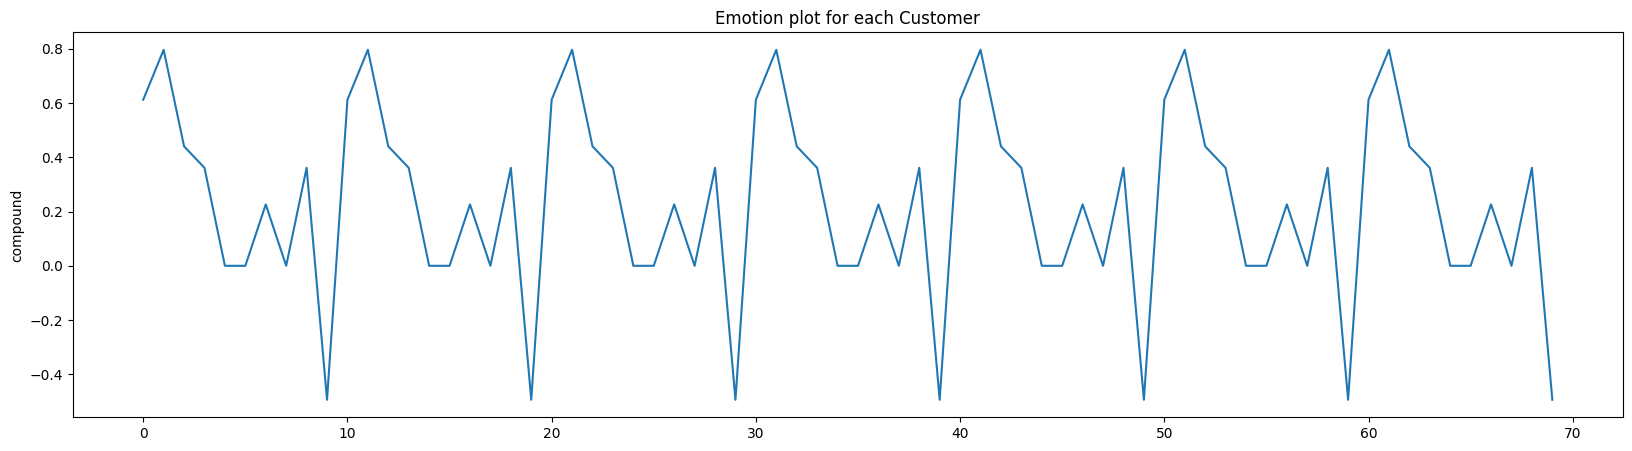

In [160]:
plt.figure(figsize=(20,5))
sns.lineplot(y='compound',x=Data.index,data=Data)
plt.title("Emotion plot for each Customer")

In [161]:
Data.head(14)

,title,rating,body_en,Sentiment,scores,compound,comp_score
0,4.0 out of 5 stars\nServes the purpose,4.0,brand qualiti decent price look decent wear fi...,Satisfied,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.6124,Satisfied
1,4.0 out of 5 stars\nThis was the best I ever p...,4.0,sleeper good explaini purchas one year ago sti...,Satisfied,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.7964,Satisfied
2,4.0 out of 5 stars\nSo light waight sleeper s,4.0,good look lightweight sleeper,Satisfied,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,Satisfied
3,4.0 out of 5 stars\n#sparx,4.0,awesom comfort,Satisfied,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.3612,Satisfied
4,4.0 out of 5 stars\nWorth for money,4.0,satisfi qualitygood product,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
5,3.0 out of 5 stars\nNot the bestest of slippers,3.0,bestest slipper,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
6,3.0 out of 5 stars\nAfter 3 Weeks,3.0,build qualiti overal product price rang worth ...,Satisfied,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.2263,Satisfied
7,3.0 out of 5 stars\nSize is very large,3.0,dislik,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
8,5.0 out of 5 stars\nGood for rough use,5.0,light weight comfort,Satisfied,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",0.3612,Satisfied
9,4.0 out of 5 stars\nGood,4.0,someon stolen masjid,Not satisfied,"{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...",-0.4939,Not satisfied


In [162]:
Emotion.head(10)

,sentiment
0,Satisfied
1,Satisfied
2,Satisfied
3,Satisfied
4,neutral
5,neutral
6,Satisfied
7,neutral
8,Satisfied
9,Not satisfied


In [163]:
sentiment_data=Emotion['sentiment']

In [164]:
sentiment_data

0         Satisfied
1         Satisfied
2         Satisfied
3         Satisfied
4           neutral
          ...      
65          neutral
66        Satisfied
67          neutral
68        Satisfied
69    Not satisfied
Name: sentiment, Length: 70, dtype: object

In [165]:
sentiment_counts = pd.Series(sentiment_data).value_counts()

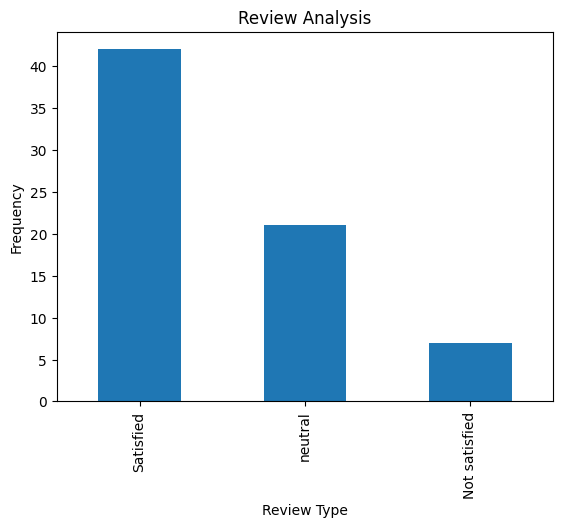

In [166]:
ax = sentiment_counts.plot.bar()
ax.set_xlabel('Review Type')
ax.set_ylabel('Frequency')
ax.set_title('Review Analysis')
plt.show()

In [167]:
print(accuracy_score(Data["Sentiment"],Data['comp_score']))

1.0


## Word Cloud

In [168]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [169]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

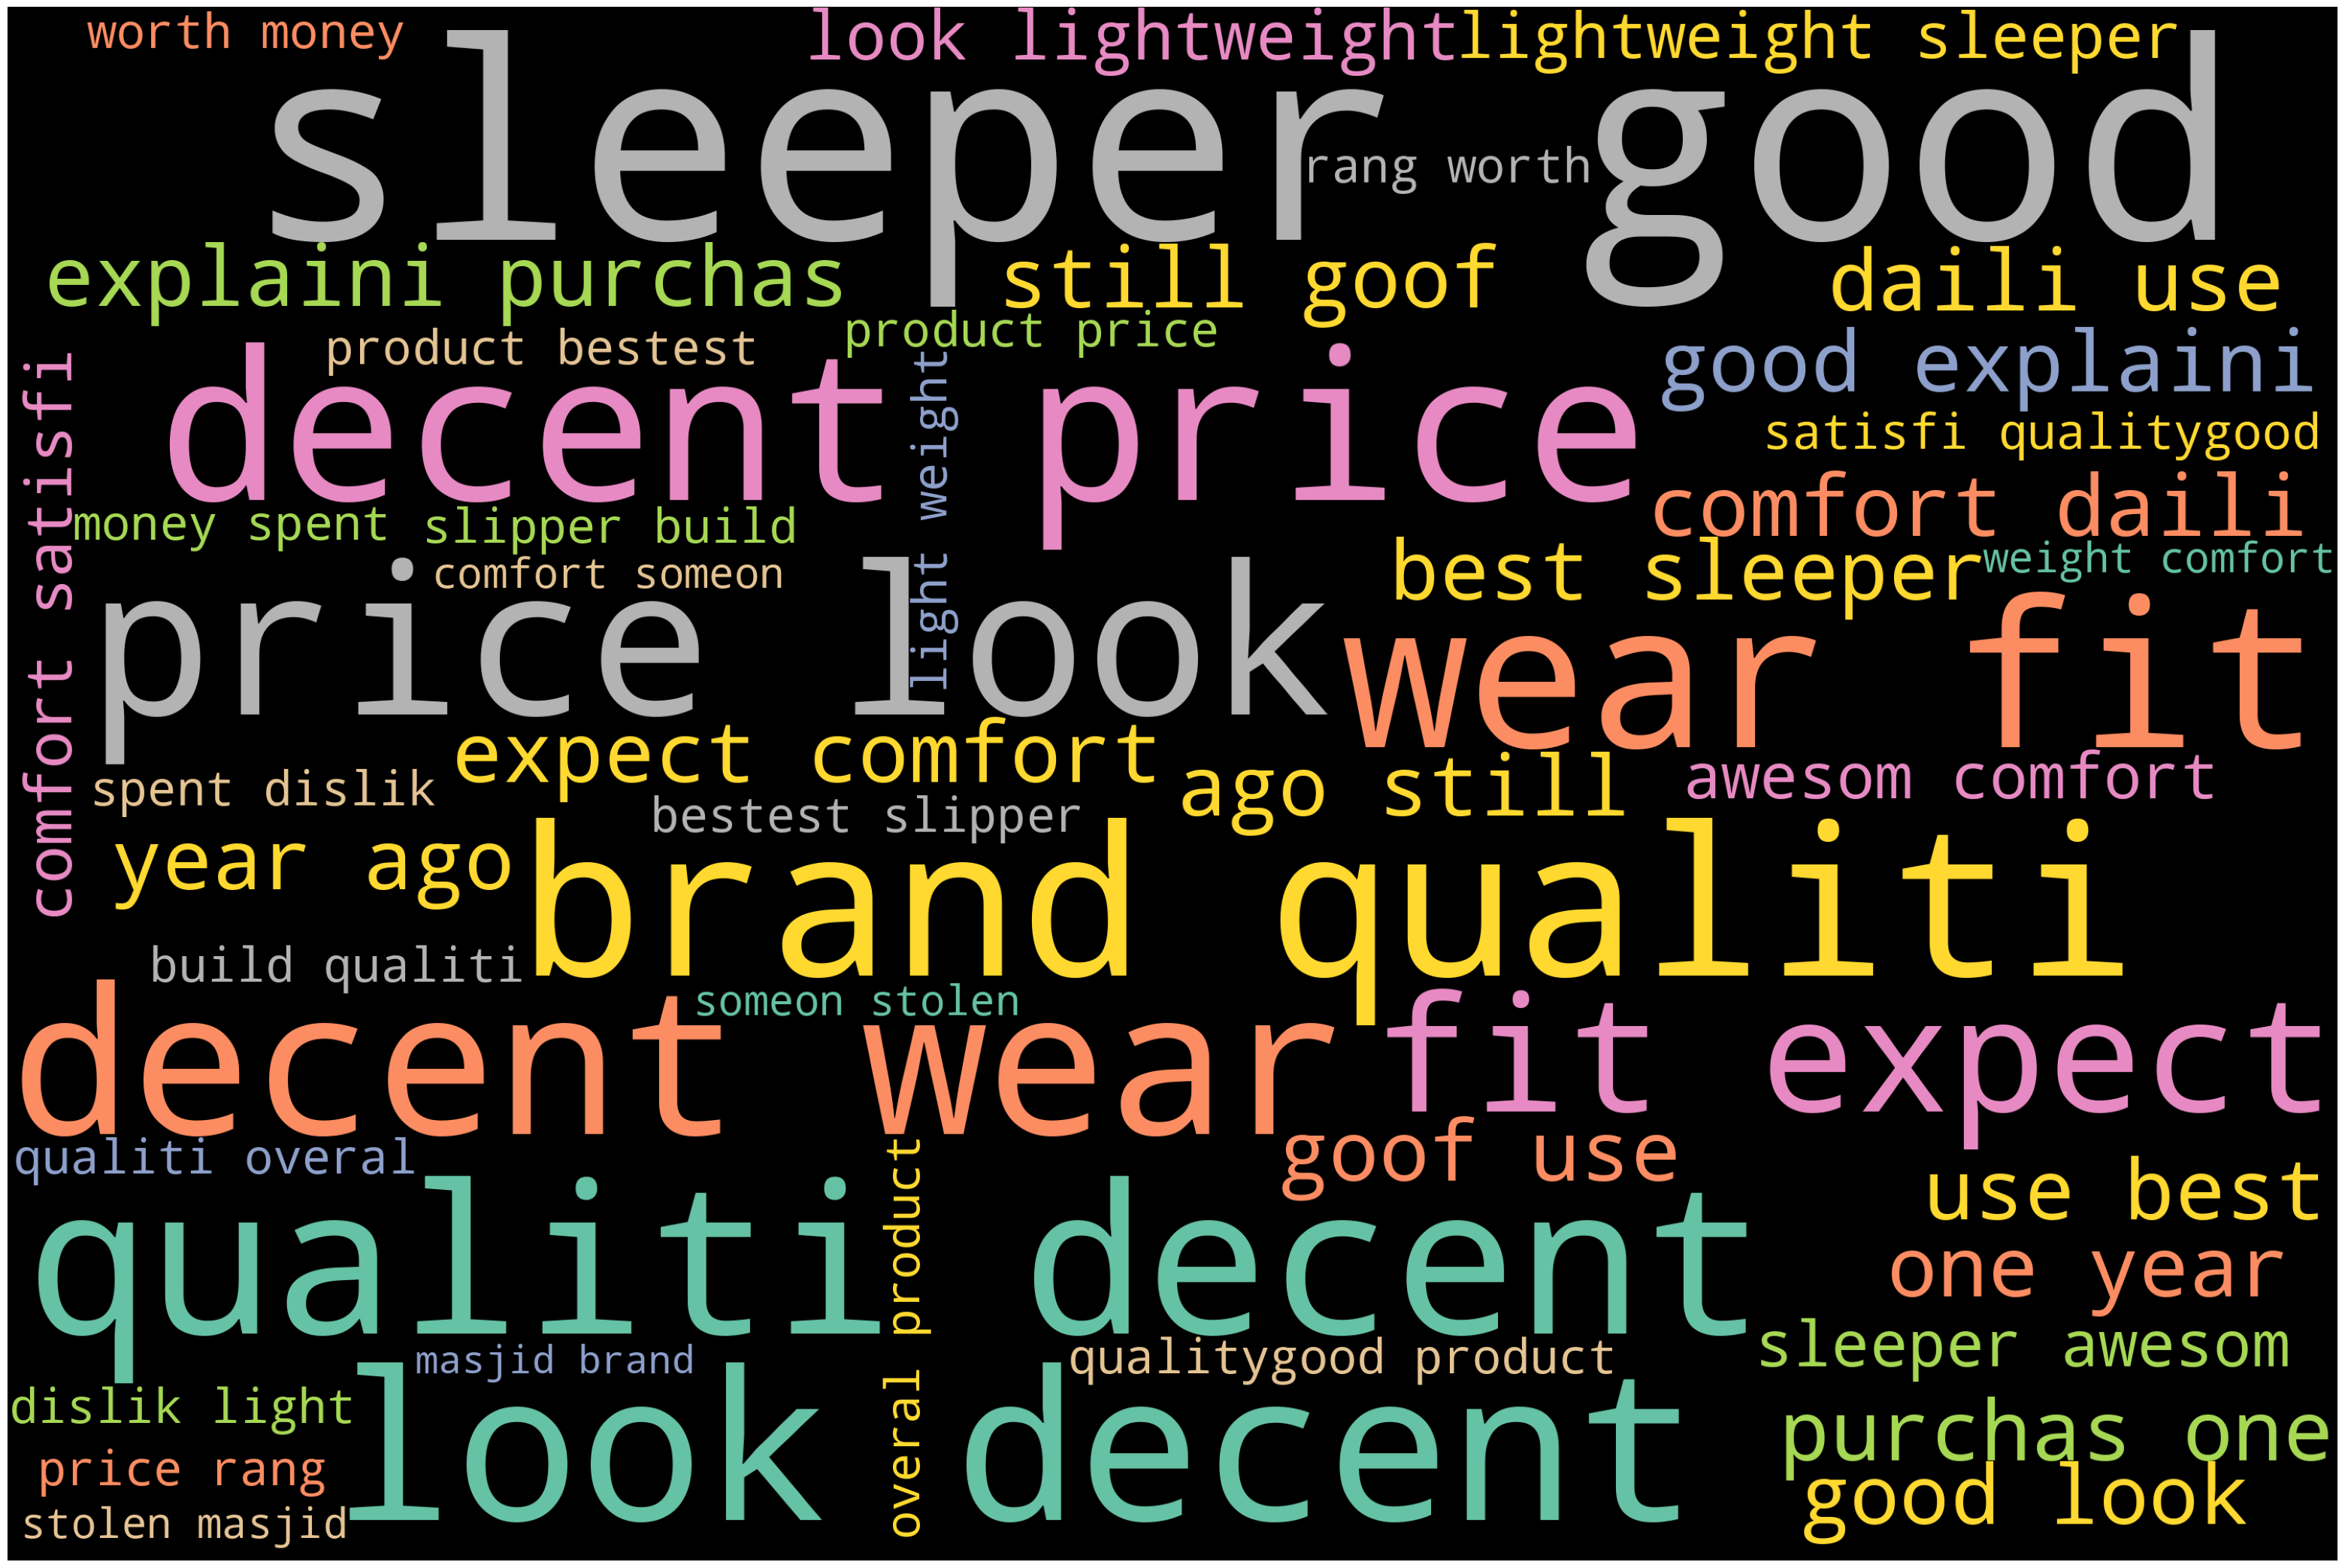

In [170]:
word = np.array(Data["body_en"])
word = word.astype(str)  # convert to string type
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(word))
plot_cloud(wordcloud)

#### Most of the customers given good review

## MODEL BUILDING

#### Importing Libraries

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [172]:
label=LabelEncoder()
score=label.fit_transform(Data["comp_score"])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(b ,score, test_size = 0.3)

In [174]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.82607661, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.63687671, 0.        ,
        0.        ]])

In [175]:
y_train

array([1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1])

In [176]:
models=[DecisionTreeClassifier(random_state=10),LogisticRegression(),RandomForestClassifier(n_estimators=100)]
for model in models:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(model,"accuracy ::",accuracy_score(y_test,y_test_pred))
    print(classification_report(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))
    print("=="*10)
    print()

DecisionTreeClassifier(random_state=10) accuracy :: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[ 3  0  0]
 [ 0 10  0]
 [ 0  0  8]]

LogisticRegression() accuracy :: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[ 3  0  0]
 [ 0 10  0]
 [ 0  0  8]]

RandomForestClassifier() accuracy :: 1.0
              precision    r